# Fasting Blood Sugar Level & Maximum Heart Rate vs. Presence of Coronary Heart Disease

## Introduction

Coronary artery disease results from the accumulation of cholesterol in the walls of the coronary arteries. Over time, this buildup of plaque causes the arteries to constrict leading to the condition. We will be seeing if the relationship between fasting blood sugar and maximum heart rate achieved during exercise can predict the presence of coronary heart disease, using the dataset “Heart Disease” given by the course. Within this data set, fasting blood sugar is a measurement of blood sugar after fasting overnight and maximum heart rate is a measure of the highest heart rate reached during exercise. This dataset includes information from research undertaken across four different areas: the USA (Cleveland and Long Beach), Hungary, and Switzerland, but we will only be using data from Cleveland.

## Preliminary exploratory data analysis

In [21]:
library(tidyverse) #for data wrangling
library(repr)  #for data visualizing
parser = html.fromstring(bytes(pagetext, encoding='utf8')) #for downloading as html

In [22]:
temp <- tempfile()
download.file("https://archive.ics.uci.edu/static/public/45/heart+disease.zip",temp)
cleveland <- read_csv(unz(temp, "processed.cleveland.data"))
unlink(temp)
colnames(cleveland) = c("age","sex","cp","trestbps", "chol","fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num") #column headers come from dataset website
cleveland$num <- ifelse(cleveland$num>0, 1, 0) #This line of code converts all values > 1 in num to just 1, in order to binarize it.
processed_cleveland <- select(cleveland, fbs, thalach, num) |> #we only care about fbs, thalach, num
                mutate(fbs = as_factor(fbs)) |> #we consider fbs as a predictor categorical variable
                mutate(num = as_factor(num)) #we consider num as a goal categorical variable
head(processed_cleveland) #data after first round of processing

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fbs,thalach,num
<fct>,<dbl>,<fct>
0,108,1
0,129,1
0,187,0
0,172,0
0,178,0
0,160,1


In [23]:
split_cleveland <- initial_split(processed_cleveland, prop = 0.75, strata = num) #this step is splitting the data into 75% training, 25% test
trainingdata <- training(split_cleveland) 
testingdata <- testing(split_cleveland)
head(trainingdata) #training data
head(testingdata) #testing data

fbs,thalach,num
<fct>,<dbl>,<fct>
0,163,0
0,148,0
0,153,0
0,173,0
0,174,0
0,160,0


fbs,thalach,num
<fct>,<dbl>,<fct>
0,187,0
0,172,0
0,178,0
0,147,1
1,142,1
1,162,0


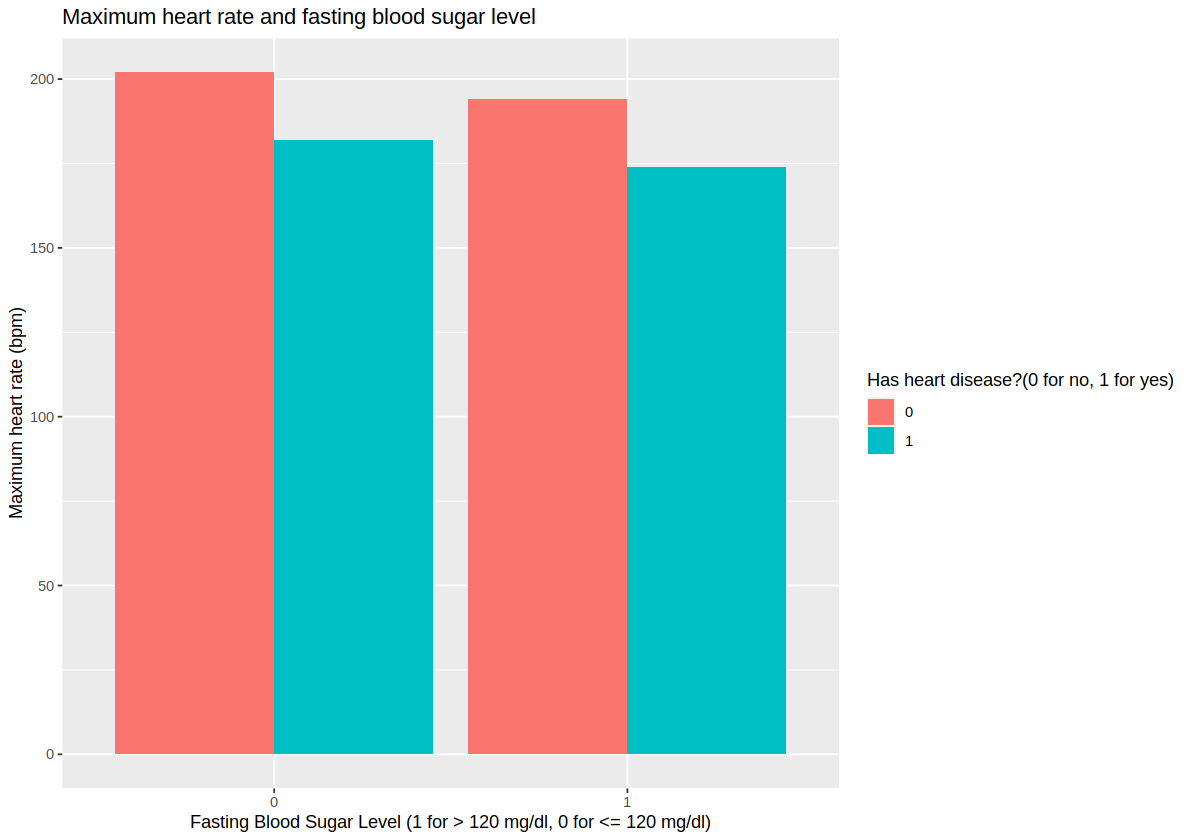

In [24]:
options(repr.plot.width = 10, repr.plot.height = 7) #for visualizing only
plot <- ggplot(trainingdata, aes(x = fbs, y = thalach, fill = num)) + 
geom_bar(position = "dodge", stat = "identity") + 
labs(x = "Fasting Blood Sugar Level (1 for > 120 mg/dl, 0 for <= 120 mg/dl)", y = "Maximum heart rate (bpm)", fill = "Has heart disease?(0 for no, 1 for yes)") +
ggtitle("Maximum heart rate and fasting blood sugar level")
plot

## Methods

We will be using variable #16 (fbs), whether or not their fasting blood sugar level > 120 mg/dl, and variable #32 (thalach), maximum heart rate achieved during exercise, to see if we can predict and classify variable #58 (num), the severity of heart disease in the patient. Note that for variable #58, we will be splitting the class into whether someone does not have a heart disease (num = 0) or does have some heart disease (num > 0). We will also only be using USA data from the Cleveland database for our analysis. To visualize the data, we will graph our results in a bar plot with maximum heart rate on the y-axis and fasting blood sugar on the x-axis, with bars organized by colour based on whether or not individuals are diagnosed with coronary heart disease.

## Expected outcomes and significance

Individuals with higher fasting blood sugar and/or lower maximum heart rate achieved during exercise will be expected to have coronary artery disease. These findings could help people who have abnormally high fasting blood sugar levels or low maximum heart rates to understand the risks associated with these conditions. This could then encourage them to change their lifestyles in order to decrease their chances of developing heart disease. The outcome of this analysis could lead to questions about how to decrease fasting blood sugar levels, potentially by better monitoring what you eat at night and at what time you eat.

## References

Coronary artery disease. Centers for Disease Control and Prevention. (2021, July 19). https://www.cdc.gov/heartdisease/coronary_ad.htm#:~:text=Coronary%20artery%20disease%20is%20caused,This%20process%20is%20called%20atherosclerosis

Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J. J., Sandhu, S., Guppy, K. H., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American journal of cardiology, 64(5), 304–310. https://doi.org/10.1016/0002-9149(89)90524-9

Diabetes tests. Centers for Disease Control and Prevention. (2023, February 28). https://www.cdc.gov/diabetes/basics/getting-tested.html#:~:text=Fasting%20Blood%20Sugar%20Test,higher%20indicates%20you%20have%20diabetes

Park, C., Guallar, E., Linton, J. A., Lee, D.-C., Jang, Y., Son, D. K., Han, E.-J., Baek, S. J., Yun, Y. D., Jee, S. H., & Samet, J. M. (2013). Fasting glucose level and the risk of incident atherosclerotic cardiovascular diseases. Diabetes Care, 36(7), 1988–1993. https://doi.org/10.2337/dc12-1577

Sandvik, L., Erikssen, J., Ellestad, M., Erikssen, G., Thaulow, E., Mundal, R., & Rodahl, K. (1995). Heart rate increase and maximal heart rate during exercise as predictors of cardiovascular mortality. Coronary Artery Disease, 6(8), 667–679. https://doi.org/10.1097/00019501-199508000-00012